### Import required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report

### import database

In [2]:
df= pd.read_csv('pokemon.csv', sep=',')
df.head()
df.size
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [4]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


Visualize database

In [5]:
types=df['Type 1'].isin(['Grass', 'Fire', 'Water'])
drop_cols= ['Type 1', 'Type 2', 'Generation', 'Legendary']
df= df[types].drop(columns=drop_cols)
df.head()

,#,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,Bulbasaur,318,45,49,49,65,65,45
1,2,Ivysaur,405,60,62,63,80,80,60
2,3,Venusaur,525,80,82,83,100,100,80
3,3,VenusaurMega Venusaur,625,80,100,123,122,120,80
4,4,Charmander,309,39,52,43,60,50,65


### Create a K-means

In [8]:
from sklearn.cluster import KMeans
import numpy as np

In [11]:
kmeans= KMeans(n_clusters=3, random_state=3)
df['cluster']= kmeans.fit_predict(df[['Attack', 'Defense']])

centroids= kmeans.cluster_centers_

cen_x = [i[0] for i in centroids]
cen_y = [i[1] for i in centroids]

df['cen_x']= df.cluster.map({0: cen_x[0], 1: cen_x[1], 2: cen_x[2] })
df['cen_y']= df.cluster.map({0: cen_y[0], 1: cen_y[1], 2: cen_y[2] })

colors = ['#DF2020', '#81DF20', '#2095DF']
df['c'] = df.cluster.map({0: colors[0], 1: colors[1], 2: colors[2]})

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


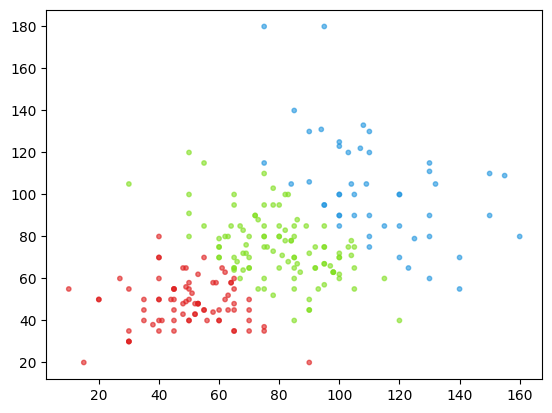

In [12]:
%matplotlib inline
plt.scatter(df['Attack'], df['Defense'], c=df['c'], alpha=0.6, s=10)

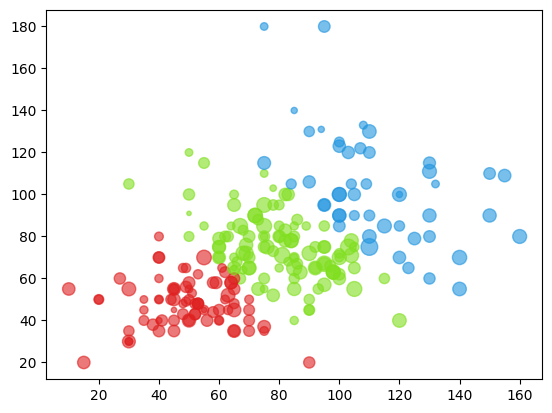

In [13]:
plt.scatter(df['Attack'], df['Defense'], c=df['c'], alpha=0.6, s=df['Speed'])

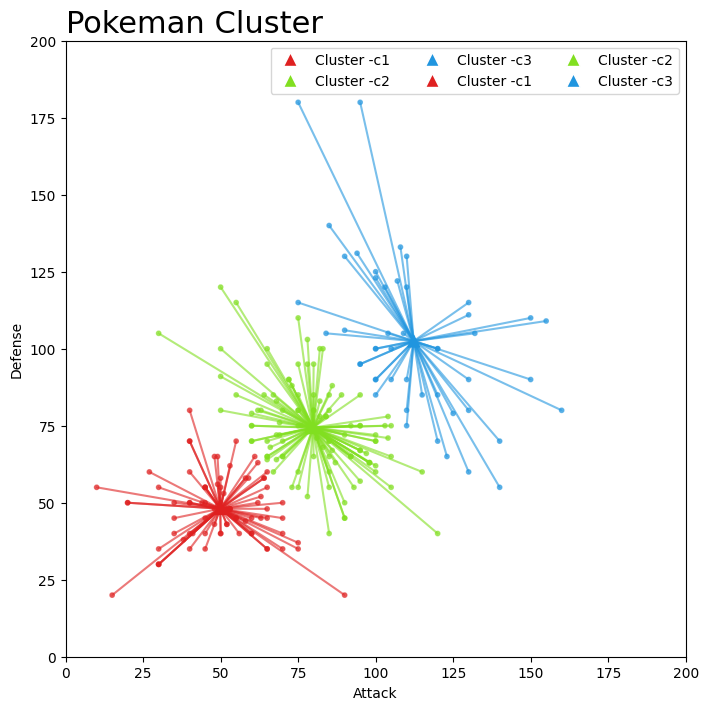

In [14]:
from matplotlib.lines import Line2D

fig, ax= plt.subplots(1, figsize=(8,8) )

plt.scatter(df['Attack'], df['Defense'], c=df['c'], alpha=0.6, s=10)
plt.scatter(cen_x, cen_y, marker='^', s=70, c=colors)

for idx, val in df.iterrows():
  x= [val['Attack'], val['cen_x']]
  y= [val['Defense'], val['cen_y']]
  plt.plot(x, y, c=val['c'], alpha=0.6)

## centroids
cent_leg= [Line2D([0], [0], marker='^', color='w', label=f'Centroid -c{i+1}', markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)]

## legend
legend_element= [Line2D([0], [0], marker='^', color='w', label=f'Cluster -c{i+1}', markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)]
legend_element.extend( [Line2D([0], [0], marker='^', color='w', label=f'Cluster -c{i+1}', markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)]
)

plt.legend(handles=legend_element, loc='upper right', ncol=3)
plt.xlim(0, 200)
plt.ylim(0, 200)
plt.title('Pokeman Cluster', loc='left', fontsize=22)
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.show()